In [2]:
from textblob import TextBlob
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
true = pd.read_csv('cleaned_True.csv')
trueData = pd.DataFrame(true)
fake = pd.read_csv('cleaned_Fake.csv')
fakeData = pd.DataFrame(fake)
trueData['lemmatized']=trueData['title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


# trueData['polarity']=trueData['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

# print("3 with Highest Polarity:")
# for index,review in enumerate(trueData.iloc[trueData['polarity'].sort_values(ascending=False)[:3].index]['title']):
#       print('Title {}:\n'.format(index+1),review)
subjectivity = 0
polarity = 0
count = 0
for index, row in trueData.iterrows():
    subjectivity += TextBlob(row['title']).subjectivity
    polarity += TextBlob(row['title']).polarity
    count+=1
    #print(TextBlob(row['title']).sentiment)
print("Average Subjectivity: (True)",(subjectivity/count))
print("Average Polarity: (True)",(polarity/count))

subjectivity1 = 0
polarity1 = 0
count1 = 0
for index, row in fakeData.iterrows():
    subjectivity1 += TextBlob(row['title']).subjectivity
    polarity1 += TextBlob(row['title']).polarity
    count1+=1
    #print(TextBlob(row['title']).sentiment)
print("Average Subjectivity (Fake): ",(subjectivity1/count1))
print("Average Polarity (Fake) : ",(polarity1/count1))

Average Subjectivity: (True) 0.17452689445825756
Average Polarity: (True) 0.0248856910541843
Average Subjectivity (Fake):  0.37739146314372185
Average Polarity (Fake) :  0.003225340463232266


<AxesSubplot:>

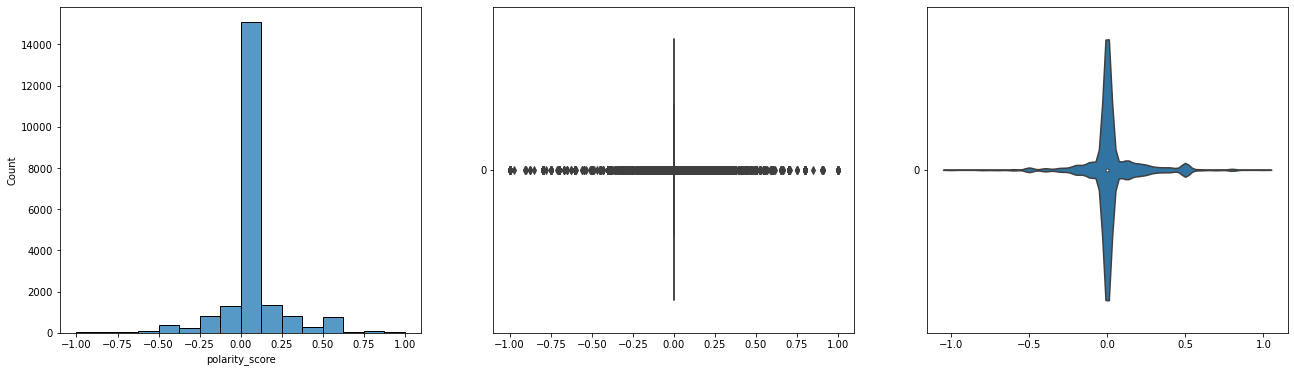

In [3]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
trueData['polarity_score'] = trueData['title'].apply(lambda x : polarity(x))

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
# print(trueData)
# sb.set() # set the default Seaborn style for graphics
f, axes = plt.subplots(1,3,figsize=(22,6))
sb.histplot(data = trueData['polarity_score'],ax = axes[0])
sb.boxplot(data = trueData['polarity_score'], orient = "h",ax = axes[1])
sb.violinplot(data = trueData['polarity_score'], orient = "h",ax = axes[2])

<AxesSubplot:>

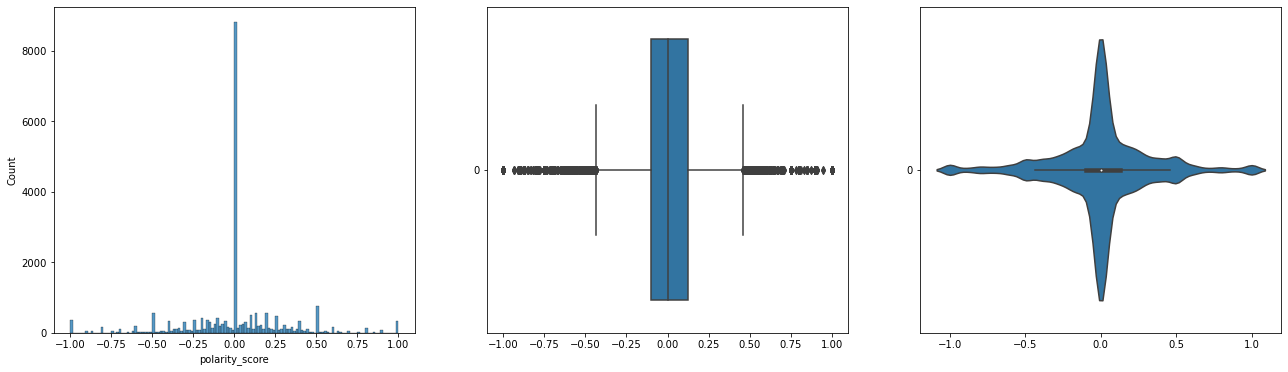

In [4]:
fakeData['polarity_score'] = fakeData['title'].apply(lambda x : polarity(x))
# fakeData['polarity_score'].hist()
f, axes = plt.subplots(1,3,figsize=(22,6))
sb.histplot(data = fakeData['polarity_score'],ax = axes[0])
sb.boxplot(data = fakeData['polarity_score'], orient = "h",ax = axes[1])
sb.violinplot(data = fakeData['polarity_score'], orient = "h",ax = axes[2])

# Analysis
Polarity tells us how postiive or negative the opinion is. Polarity score ranges from -1 to 1 where 1 is very positive, 0 is neutral, and -1 is very negative.
The above graphs show that the polarity scores for the true data and the fake data are largely neutral. However, there are greater occurrences of titles which are positive or negative for the fake data as the range of interquartile range for the fake data is larger than that of true data. Furthermore, the polarity scores for the fake data is more spread out compared to the true data as the vast majority of the data is concentrated in the middle where the polarity score is 0. 

<AxesSubplot:>

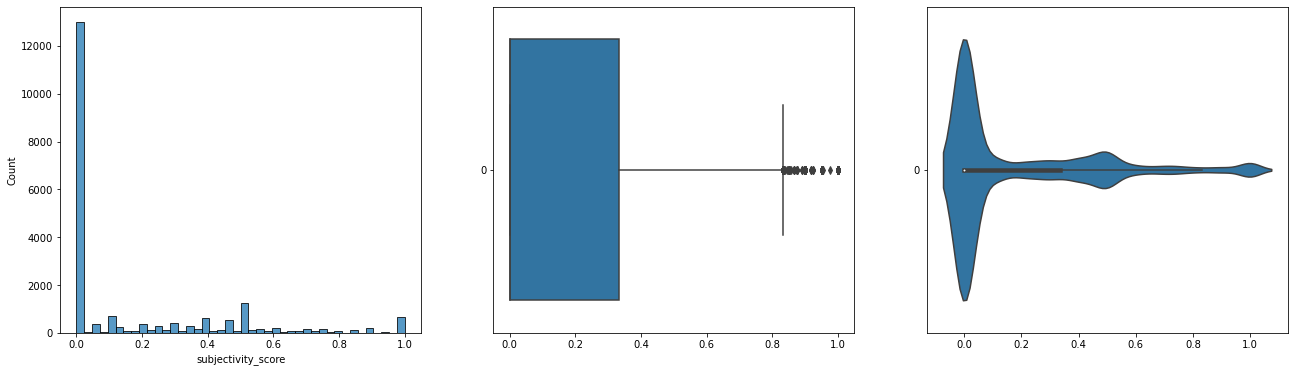

In [5]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

trueData['subjectivity_score'] = trueData['title'].apply(lambda x : subjectivity(x))
f, axes = plt.subplots(1,3,figsize=(22,6))
sb.histplot(data = trueData['subjectivity_score'],ax = axes[0])
sb.boxplot(data = trueData['subjectivity_score'],orient = "h",ax = axes[1])
sb.violinplot(data = trueData['subjectivity_score'], orient = "h",ax = axes[2])

<AxesSubplot:>

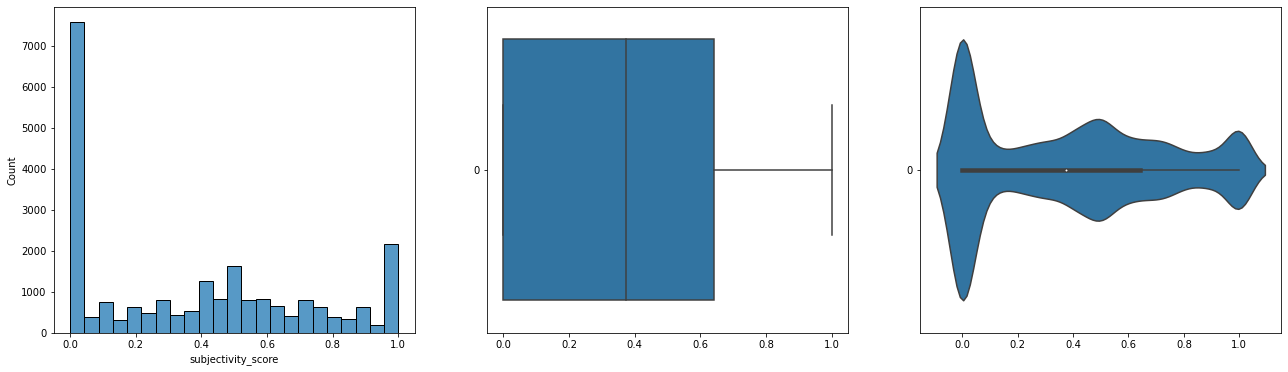

In [7]:
fakeData['subjectivity_score'] = fakeData['title'].apply(lambda x : subjectivity(x))
f, axes = plt.subplots(1,3,figsize=(22,6))
sb.histplot(data = fakeData['subjectivity_score'],ax = axes[0])
sb.boxplot(data = fakeData['subjectivity_score'],orient = "h",ax = axes[1])
sb.violinplot(data = fakeData['subjectivity_score'], orient = "h",ax = axes[2])

# Analysis
Subjectiviy tells us how subjective the opinion is. Subjectivity score ranges from 0 to 1 (0 being very objective and 1 being very subjective).
The above graphs show that the subjectivity scores for the true data and the fake data are largely objective. However, compared to true data, the fake data has greater number of occurrences where the title is more subjective as the interquartile range of the subjectivity scores for the fake data is at most twice greater than that of true data. Furthermore, the frequency of the titles being subjective for the fake data is much greater compared to the true data.

# Conclusion
Therefore, from the sentiment analysis of the titles of real and fake news, it can be concluded that the titles of fake news tend to be less neutral in polarity and more subjective. 